# CS724 Assignment 1 (190117)

# Question 1

**1) $$ A = \begin{bmatrix}
    1 & 0\\ 
    0 & 1
  \end{bmatrix} $$**

  $$ C(A) = R^2 $$ 

**2) $$ B = \begin{bmatrix}
    1 & 2\\ 
    2 & 4
  \end{bmatrix} $$**

  $$ C(B) = R^1 $$ 

**3) $$ D = \begin{bmatrix}
    1 & 2 & 3\\ 
    0 & 0 & 4
  \end{bmatrix} $$**

  $$ C(D) = R^2 $$ 

# Question 2

Let the coordinate units be Km;

User Position U: (100, 100, 100)

Let's fix the 5 satellites at the following positions:

S1: (100000, 100000, 100000)

S2: (-200000, 300000, -500000)

S3: (400000, 700000, -1000000)

S4: (1000000, -200000, 1000000)

S5: (10000000, -10000000, -10000000)


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# coordinate units: Km
user = np.array([100, 100, 100])
# speed unit: Km/s
speed = 300000 

s0 = np.array([100000, 100000, 100000])
s1 = np.array([-200000, 300000, -500000])
s2 = np.array([400000, 700000, -1000000])
s3 = np.array([1000000, -200000, 1000000])
s4 = np.array([10000000, -10000000, -10000000])

s = np.array([s0, s1, s2, s3, s4])
s

array([[   100000,    100000,    100000],
       [  -200000,    300000,   -500000],
       [   400000,    700000,  -1000000],
       [  1000000,   -200000,   1000000],
       [ 10000000, -10000000, -10000000]])

# (a) Time taken for a signal to arrive from each one of these satellites to the user:


In [3]:
# time taken = distance/speed

t0 = np.linalg.norm(s0-user)/speed
t1 = np.linalg.norm(s1-user)/speed
t2 = np.linalg.norm(s2-user)/speed
t3 = np.linalg.norm(s3-user)/speed
t4 = np.linalg.norm(s4-user)/speed

T = np.array([t0, t1, t2, t3, t4])
T
# In seconds

array([ 0.57677292,  2.05502103,  4.28171828,  4.76053222, 57.73521937])

# (b) Location of the user using the satellite locations and the times:

For GPS Localization, 

$$ Ax = B $$

$$ \implies \hat{x} = (A^T A)^{-1} A^T B $$

where A and B are calculated as follows:

In [4]:
R = np.multiply(300000, T)
R

array([  173031.87567613,   616506.30978117,  1284515.48453104,
        1428159.66544361, 17320565.81148549])

In [5]:
#A
A0 = np.array([np.append(2*(s1-s0),2*(R[1]-R[0])), np.append(2*(s2-s1),2*(R[2]-R[1])), np.append(2*(s3-s2),2*(R[3]-R[2])), np.append(2*(s4-s3),2*(R[4]-R[3]))])
A0

array([[  -600000.        ,    400000.        ,  -1200000.        ,
           886948.86821008],
       [  1200000.        ,    800000.        ,  -1000000.        ,
          1336018.34949972],
       [  1200000.        ,  -1800000.        ,   4000000.        ,
           287288.36182515],
       [ 18000000.        , -19600000.        , -22000000.        ,
         31784812.29208376]])

In [6]:
#B
B0 = np.array([(R[0]**2 - R[1]**2) - (np.linalg.norm(s0)**2 - np.linalg.norm(s1)**2), (R[1]**2 - R[2]**2) - (np.linalg.norm(s1)**2 - np.linalg.norm(s2)**2), (R[2]**2 - R[3]**2) - (np.linalg.norm(s2)**2 - np.linalg.norm(s3)**2), (R[3]**2 - R[4]**2) - (np.linalg.norm(s3)**2 - np.linalg.norm(s4)**2)])
B0

array([-1.40e+08,  1.00e+08,  3.40e+08, -2.36e+09])

In [7]:
# x_hat
x = np.matmul(np.matmul(np.linalg.inv(np.matmul(A0.transpose(),A0)),A0.transpose()),B0)
x
# We got U = (100,100,100) as expected

array([1.00000000e+02, 1.00000000e+02, 1.00000000e+02, 1.63396408e-10])

# (c) Adding some random errors with the times:

Even for a 1 second time difference, the error in position can be more than 300000 Km. Hence we will start with very less time error.

In [8]:
# Adding 0.0033% error in time
T_random = np.array([t0+random.randrange(-19,19)/1000000, t1+random.randrange(-69,69)/1000000, t2+random.randrange(-143,143)/1000000, t3+random.randrange(-159,159)/1000000, t4+random.randrange(-1924,1924)/1000000])
R = np.multiply(300000, T_random)
A = np.array([np.append(2*(s1-s0),2*(R[1]-R[0])), np.append(2*(s2-s1),2*(R[2]-R[1])), np.append(2*(s3-s2),2*(R[3]-R[2])), np.append(2*(s4-s3),2*(R[4]-R[3]))])
B = np.array([(R[0]**2 - R[1]**2) - (np.linalg.norm(s0)**2 - np.linalg.norm(s1)**2), (R[1]**2 - R[2]**2) - (np.linalg.norm(s1)**2 - np.linalg.norm(s2)**2), (R[2]**2 - R[3]**2) - (np.linalg.norm(s2)**2 - np.linalg.norm(s3)**2), (R[3]**2 - R[4]**2) - (np.linalg.norm(s3)**2 - np.linalg.norm(s4)**2)])
x_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.transpose(),A)),A.transpose()),B)
print("User Position:", x_hat) # first 3 elements are its coordinates
print("Distance from actual position of user:", np.linalg.norm(x_hat - np.array([100,100,100,x_hat[3]])))
# We see 100s of Kms of position error

User Position: [ 211.74052593 -379.87752919 -135.40871445  -48.3132975 ]
Distance from actual position of user: 546.0637792406587


# (d) Increasing Time errors:

Taking time errors 0.0033%, 0.033%, 0.1%, 0.33%, 1% and taking average of User Position and Error in Position to plot a curve for the same:

In [9]:
# Error in Time = 0.0033%
sum = np.array([0,0,0,0])
error1 = 0
for i in range(0,10):
  T_random = np.array([t0+random.randrange(-19,19)/1000000, t1+random.randrange(-69,69)/1000000, t2+random.randrange(-143,143)/1000000, t3+random.randrange(-159,159)/1000000, t4+random.randrange(-1924,1924)/1000000])
  R = np.multiply(300000, T_random)
  A = np.array([np.append(2*(s1-s0),2*(R[1]-R[0])), np.append(2*(s2-s1),2*(R[2]-R[1])), np.append(2*(s3-s2),2*(R[3]-R[2])), np.append(2*(s4-s3),2*(R[4]-R[3]))])
  B = np.array([(R[0]**2 - R[1]**2) - (np.linalg.norm(s0)**2 - np.linalg.norm(s1)**2), (R[1]**2 - R[2]**2) - (np.linalg.norm(s1)**2 - np.linalg.norm(s2)**2), (R[2]**2 - R[3]**2) - (np.linalg.norm(s2)**2 - np.linalg.norm(s3)**2), (R[3]**2 - R[4]**2) - (np.linalg.norm(s3)**2 - np.linalg.norm(s4)**2)])
  x_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.transpose(),A)),A.transpose()),B)
  error_x = np.linalg.norm(x_hat - np.array([100,100,100,x_hat[3]]))
  error1 = error1 + error_x
  sum = sum + x_hat

print("Average User Position:", sum/10) # first 3 elements are its coordinates
print("Average Error in Position:", error1/10)

Average User Position: [ 37.54565295 279.62258505 199.42628234  18.362093  ]
Average Error in Position: 280.7391792353266


In [10]:
# Error in Time = 0.033%
sum = np.array([0,0,0,0])
error2 = 0
for i in range(0,10):
  T_random = np.array([t0+random.randrange(-19,19)/100000, t1+random.randrange(-69,69)/100000, t2+random.randrange(-143,143)/100000, t3+random.randrange(-159,159)/100000, t4+random.randrange(-1924,1924)/100000])
  R = np.multiply(300000, T_random)
  A = np.array([np.append(2*(s1-s0),2*(R[1]-R[0])), np.append(2*(s2-s1),2*(R[2]-R[1])), np.append(2*(s3-s2),2*(R[3]-R[2])), np.append(2*(s4-s3),2*(R[4]-R[3]))])
  B = np.array([(R[0]**2 - R[1]**2) - (np.linalg.norm(s0)**2 - np.linalg.norm(s1)**2), (R[1]**2 - R[2]**2) - (np.linalg.norm(s1)**2 - np.linalg.norm(s2)**2), (R[2]**2 - R[3]**2) - (np.linalg.norm(s2)**2 - np.linalg.norm(s3)**2), (R[3]**2 - R[4]**2) - (np.linalg.norm(s3)**2 - np.linalg.norm(s4)**2)])
  x_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.transpose(),A)),A.transpose()),B)
  error_x = np.linalg.norm(x_hat - np.array([100,100,100,x_hat[3]]))
  error2 = error2 + error_x
  sum = sum + x_hat

print("Average User Position:", sum/10) # first 3 elements are its coordinates
print("Average Error in Position:", error2/10)

Average User Position: [ -94.19857026 1085.73769073  535.24871053   -2.72802695]
Average Error in Position: 3533.691308802497


In [11]:
# Error in Time = 0.1%
sum = np.array([0,0,0,0])
error3 = 0
for i in range(0,10):
  T_random = np.array([t0+random.randrange(-58,58)/100000, t1+random.randrange(-206,206)/100000, t2+random.randrange(-428,428)/100000, t3+random.randrange(-476,476)/100000, t4+random.randrange(-5774,5774)/100000])
  R = np.multiply(300000, T_random)
  A = np.array([np.append(2*(s1-s0),2*(R[1]-R[0])), np.append(2*(s2-s1),2*(R[2]-R[1])), np.append(2*(s3-s2),2*(R[3]-R[2])), np.append(2*(s4-s3),2*(R[4]-R[3]))])
  B = np.array([(R[0]**2 - R[1]**2) - (np.linalg.norm(s0)**2 - np.linalg.norm(s1)**2), (R[1]**2 - R[2]**2) - (np.linalg.norm(s1)**2 - np.linalg.norm(s2)**2), (R[2]**2 - R[3]**2) - (np.linalg.norm(s2)**2 - np.linalg.norm(s3)**2), (R[3]**2 - R[4]**2) - (np.linalg.norm(s3)**2 - np.linalg.norm(s4)**2)])
  x_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.transpose(),A)),A.transpose()),B)
  error_x = np.linalg.norm(x_hat - np.array([100,100,100,x_hat[3]]))
  error3 = error3 + error_x
  sum = sum + x_hat

print("Average User Position:", sum/10) # first 3 elements are its coordinates
print("Average Error in Position:", error3/10)

Average User Position: [  829.02603312 -1495.01390612  -938.54607597  -120.34463614]
Average Error in Position: 10377.422167681067


In [12]:
# Error in Time = 0.33%
sum = np.array([0,0,0,0])
error4 = 0
for i in range(0,10):
  T_random = np.array([t0+random.randrange(-19,19)/10000, t1+random.randrange(-69,69)/10000, t2+random.randrange(-143,143)/10000, t3+random.randrange(-159,159)/10000, t4+random.randrange(-1924,1924)/10000])
  R = np.multiply(300000, T_random)
  A = np.array([np.append(2*(s1-s0),2*(R[1]-R[0])), np.append(2*(s2-s1),2*(R[2]-R[1])), np.append(2*(s3-s2),2*(R[3]-R[2])), np.append(2*(s4-s3),2*(R[4]-R[3]))])
  B = np.array([(R[0]**2 - R[1]**2) - (np.linalg.norm(s0)**2 - np.linalg.norm(s1)**2), (R[1]**2 - R[2]**2) - (np.linalg.norm(s1)**2 - np.linalg.norm(s2)**2), (R[2]**2 - R[3]**2) - (np.linalg.norm(s2)**2 - np.linalg.norm(s3)**2), (R[3]**2 - R[4]**2) - (np.linalg.norm(s3)**2 - np.linalg.norm(s4)**2)])
  x_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.transpose(),A)),A.transpose()),B)
  error_x = np.linalg.norm(x_hat - np.array([100,100,100,x_hat[3]]))
  error4 = error4 + error_x
  sum = sum + x_hat

print("Average User Position:", sum/10) # first 3 elements are its coordinates
print("Average Error in Position:", error4/10)

Average User Position: [ 1820.36985149 -5385.12957888 -3771.83411443 -1414.00950749]
Average Error in Position: 30447.46013617243


In [13]:
# Error in Time = 1%
sum = np.array([0,0,0,0])
error5 = 0
for i in range(0,10):
  T_random = np.array([t0+random.randrange(-58,58)/10000, t1+random.randrange(-206,206)/10000, t2+random.randrange(-428,428)/10000, t3+random.randrange(-476,476)/10000, t4+random.randrange(-5774,5774)/10000])
  R = np.multiply(300000, T_random)
  A = np.array([np.append(2*(s1-s0),2*(R[1]-R[0])), np.append(2*(s2-s1),2*(R[2]-R[1])), np.append(2*(s3-s2),2*(R[3]-R[2])), np.append(2*(s4-s3),2*(R[4]-R[3]))])
  B = np.array([(R[0]**2 - R[1]**2) - (np.linalg.norm(s0)**2 - np.linalg.norm(s1)**2), (R[1]**2 - R[2]**2) - (np.linalg.norm(s1)**2 - np.linalg.norm(s2)**2), (R[2]**2 - R[3]**2) - (np.linalg.norm(s2)**2 - np.linalg.norm(s3)**2), (R[3]**2 - R[4]**2) - (np.linalg.norm(s3)**2 - np.linalg.norm(s4)**2)])
  x_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.transpose(),A)),A.transpose()),B)
  error_x = np.linalg.norm(x_hat - np.array([100,100,100,x_hat[3]]))
  error5 = error5 + error_x
  sum = sum + x_hat

print("Average User Position:", sum/10) # first 3 elements are its coordinates
print("Average Error in Position:", error5/10)

Average User Position: [ 19925.29748075 -69802.33476962 -37691.66555276  -6125.96777612]
Average Error in Position: 135292.75167048993


Graph: **Amount of timing errors** vs **Localization error**:

(<matplotlib.collections.PathCollection at 0x7fee78c71b10>,
 [<matplotlib.lines.Line2D at 0x7fee78c71f90>])

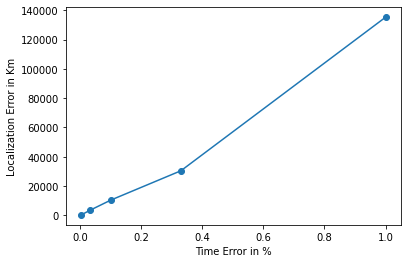

In [14]:
time_error = [0.0033,0.033,0.1,0.33,1]
localization_error = [error1/10, error2/10, error3/10, error4/10, error5/10]

plt.xlabel('Time Error in %')
plt.ylabel('Localization Error in Km')
plt.scatter(time_error, localization_error), plt.plot(time_error,localization_error)